## 1. Simple linear regression model

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df= pd.read_csv("Salary_Data.csv")

In [9]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape

(30, 2)

### Random sample of the dataset

In [15]:
df.sample(5)

,YearsExperience,Salary
29,10.5,121872.0
26,9.5,116969.0
3,2.0,43525.0
4,2.2,39891.0
25,9.0,105582.0


### Data type of the variables(Features)

In [17]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Statistical descriptions of the dataset

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


### Informations about the dataset(Dataframe)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Drop duplicates for data creaning purpose

In [31]:
df.drop_duplicates().head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Checking null values

In [32]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Create Dependent and independent variables

In [34]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [37]:
target_variable= 'Salary'
# separate object for target variable
y= df[target_variable]
# separate object for input variable variable
x= df.drop(target_variable, axis=1)


#### Data visualization

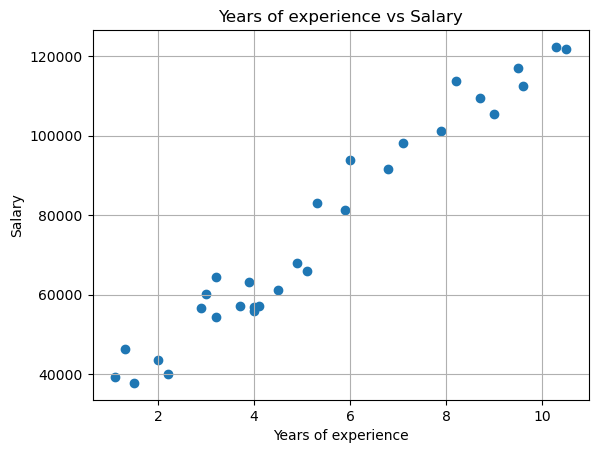

In [40]:
plt.scatter(x,y)
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Years of experience vs Salary")
plt.grid()
plt.show()

<AxesSubplot:>

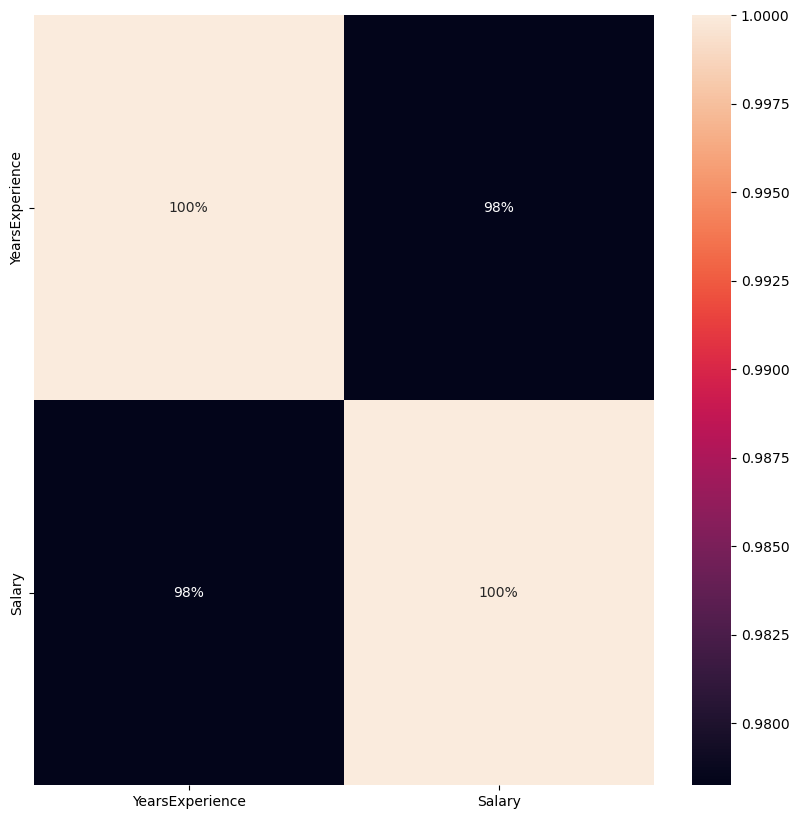

In [45]:
# visualize the correlation with heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

#### Split data into train and test

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [64]:
reg= LinearRegression()

In [65]:
reg.fit(x_train, y_train)

LinearRegression()

In [68]:
print("The intercep(b0)=", reg.intercept_)

The intercep(b0)= 26780.09915062818


In [69]:
print("The coeficient(b1)=", reg.coef_)

The coeficient(b1)= [9312.57512673]


### Apply the model on test dataset to get the predicted values

In [70]:
y_pred= reg.predict(x_test)

In [71]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

### compare actual output values with the predicted values

In [72]:
df1= pd.DataFrame({'actual':y_test, 'predicted':y_pred, 'variance':y_test-y_pred})

In [73]:
df1

,actual,predicted,variance
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


### Prediction

In [74]:
# predict the result of 1.5 years of experience
pred= np.array([1.5]).reshape(-1,1)

In [76]:
reg.predict(pred)

C:\Users\Enginner\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40748.96184072])

### Visualize our training model

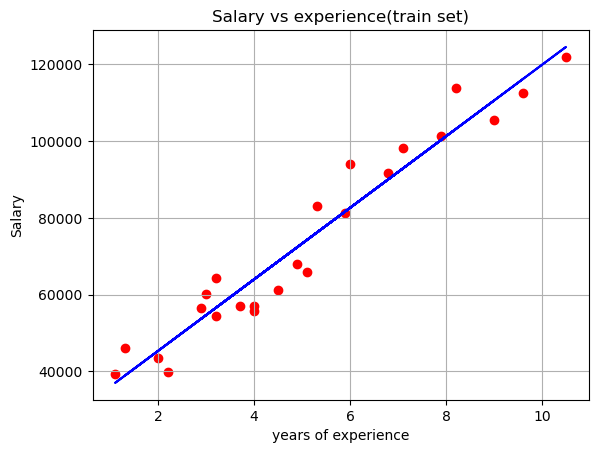

In [77]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, reg.predict(x_train), color= 'blue')
plt.title("Salary vs experience(train set)")
plt.xlabel("years of experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

### Visualize our testing model

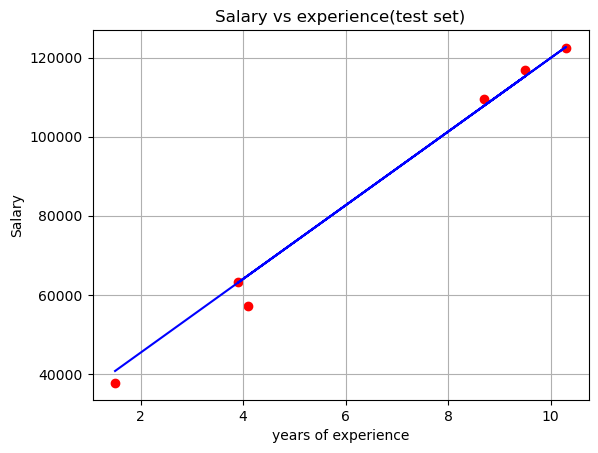

In [84]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test, reg.predict(x_test), color= 'blue')
plt.title("Salary vs experience(test set)")
plt.xlabel("years of experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

## Model performance

In [91]:
# Evaluate metrics of regression algorithms
# Check r2_score and error
from sklearn.metrics import r2_score
from sklearn import metrics
score= r2_score(y_test, y_pred)*100

In [90]:
score

98.8169515729126

#### Other metrics

In [224]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 2446.1723690465055
Mean Squared Error 12823412.298126549
Root Mean Squared Error 49.45879465824562


## 2. Multiple linear regression model

#### Loading the dataset

In [94]:
data= pd.read_csv("50_Startups.csv")

In [95]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [96]:
data.shape

(50, 5)

In [97]:
# View 5 random samples
data.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
31,61136.38,152701.92,88218.23,New York,97483.56
16,78013.11,121597.55,264346.06,California,126992.93
19,86419.70,153514.11,0.00,New York,122776.86
37,44069.95,51283.14,197029.42,California,89949.14
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
# check feature data types
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#### View the statistical description of the dataset

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


#### Dataset info

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Visualizations

In [106]:
# univariate plots{histogram, density plots, box and wisker plots}
# 1. histogram= able to see the distribution of each feature in the form of histogram
# 2. density plots= able to see the distribution of each feature in the form of density plot
# 3. other way of distribution of each feature by box and wisker plot. here draw a line for median.
# identify outliers in this box plot

#### Histogram plot

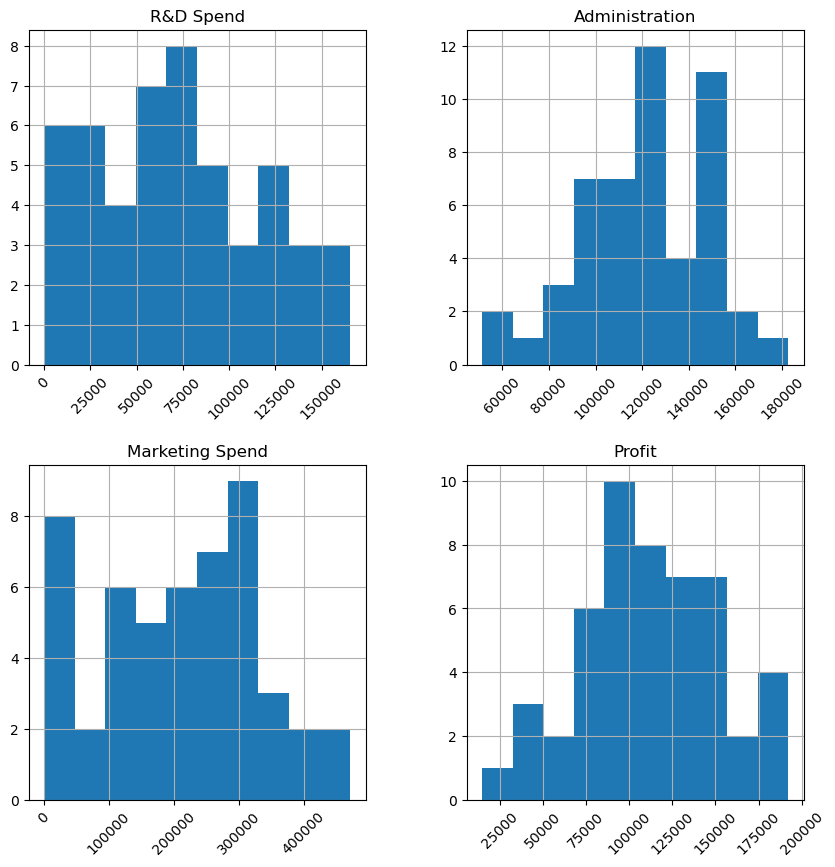

In [104]:
data.hist(xrot=45, figsize=(10,10))
plt.show()

#### Density plot

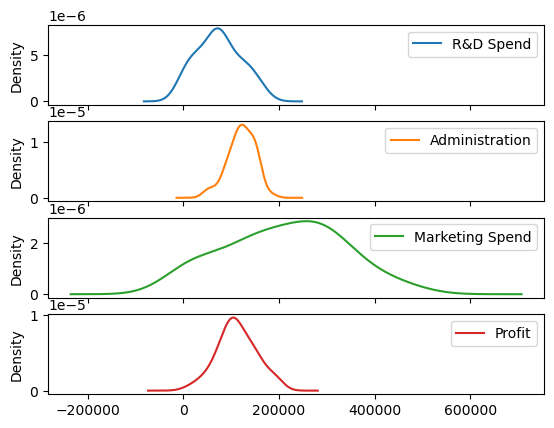

In [105]:
data.plot(kind='density', subplots=True, sharex= True)
plt.show()

### box and wisker plots

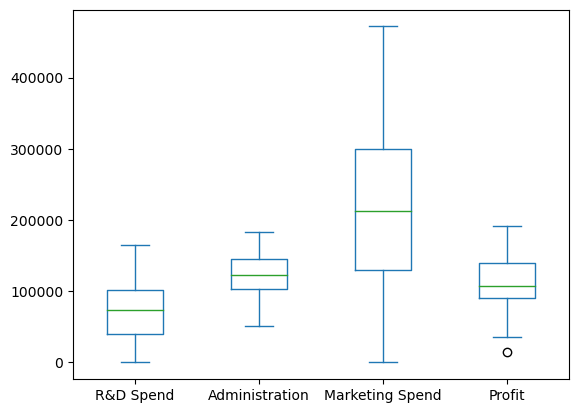

In [110]:
data.plot(kind='box',sharex= False, sharey=False)
plt.show()

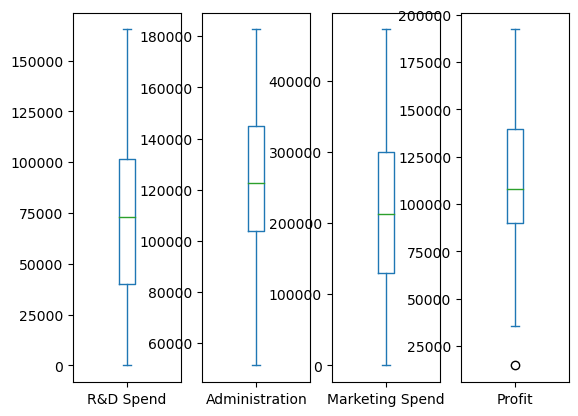

In [112]:
data.plot(kind='box',subplots= True, sharex= False, sharey=False)
plt.show()

###### Multivariate plots

In [ ]:
# This provides examples of two plots that shows interactions between multiple variables in dataset
# Multivariate plots={correlation matrix and scatter plot matrix}

### correlation matrix

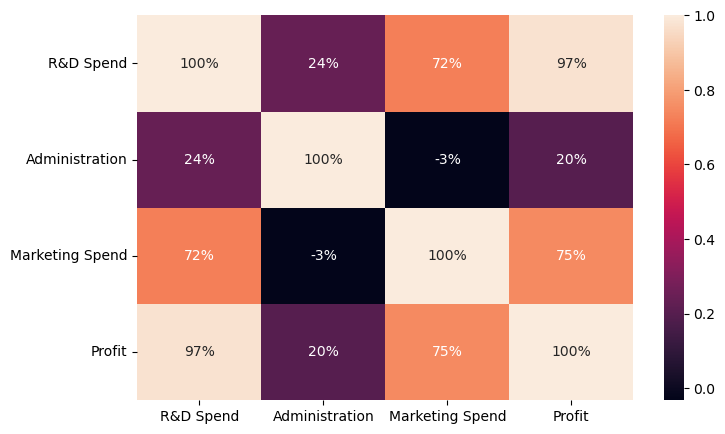

In [118]:
# most method to calculate correlation is pearson's correlation coefficient
# correlation matrix to find most significant variables
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True,fmt=".0%")
plt.show()

We can see that the matrix is symetrical i.e, the bottom left is equal to the top right.

In [119]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [120]:
correlations= data.corr(method='pearson')
print(correlations)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [121]:
from pandas.plotting import scatter_matrix

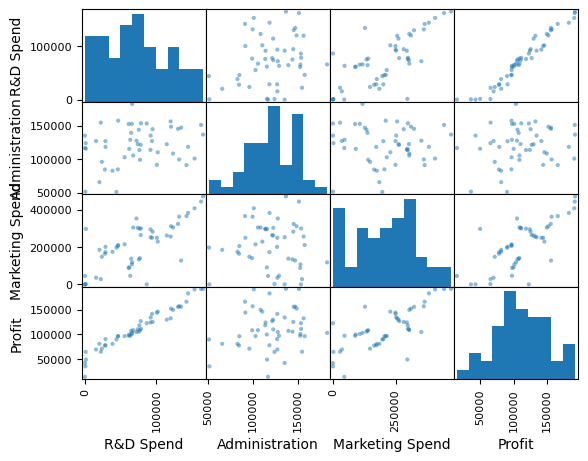

In [122]:
scatter_matrix(data)
plt.show()

### Visualization

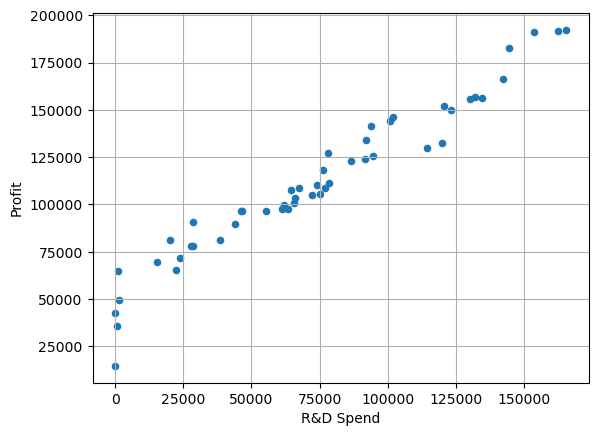

In [126]:
data.plot.scatter(x='R&D Spend',y='Profit')
plt.grid()
plt.show()

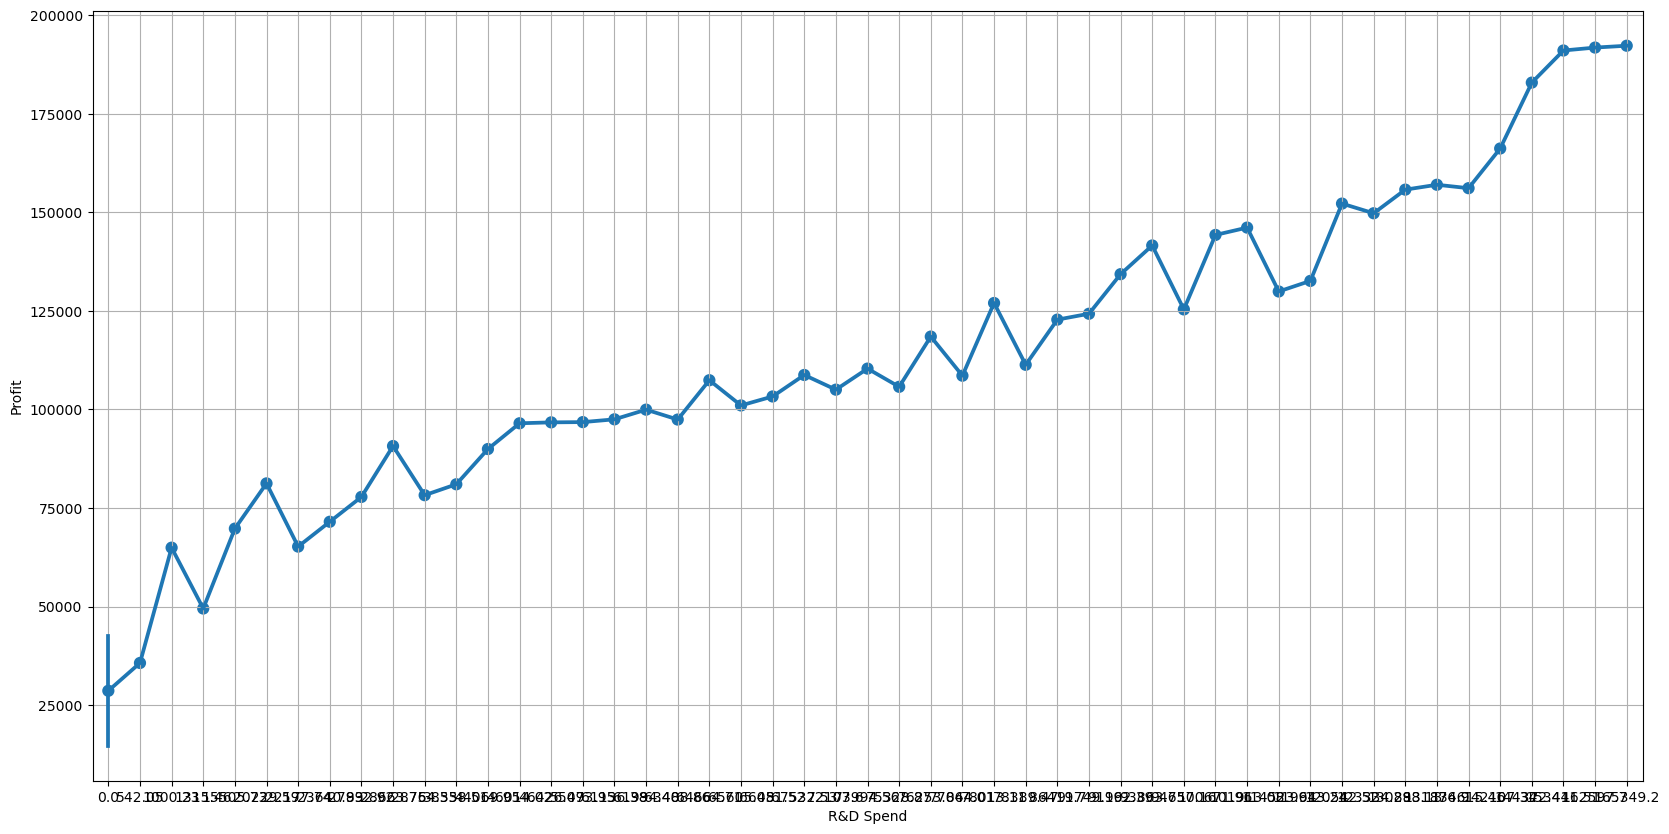

In [139]:
plt.figure(figsize=(20,10))
sns.pointplot(data=data,x='R&D Spend',y='Profit' )
plt.grid()
plt.show()

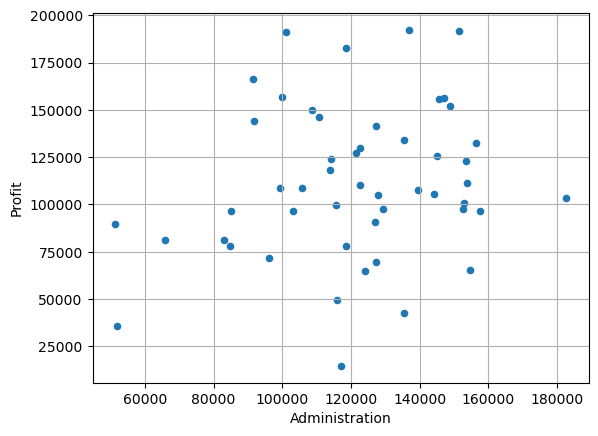

In [137]:
data.plot.scatter(x='Administration',y='Profit')
plt.grid()
plt.show()

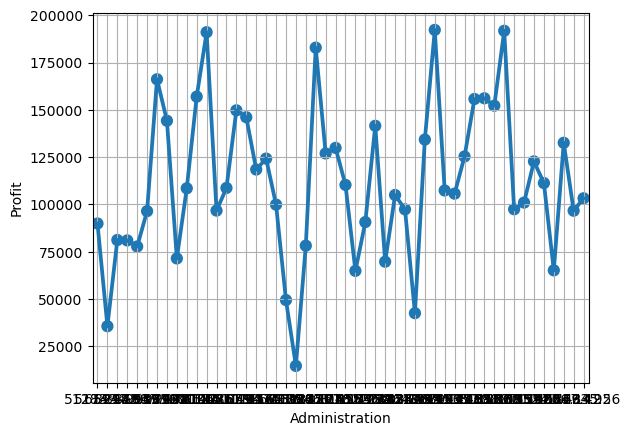

In [138]:
sns.pointplot(data=data, x='Administration',y= 'Profit')
plt.grid()
plt.show()

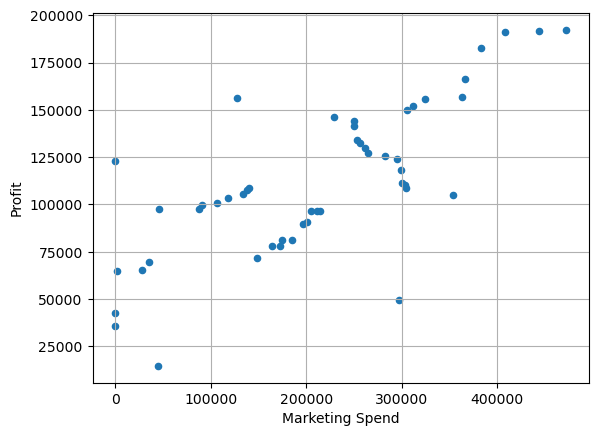

In [141]:
data.plot.scatter(x='Marketing Spend', y='Profit')
plt.grid()
plt.show()

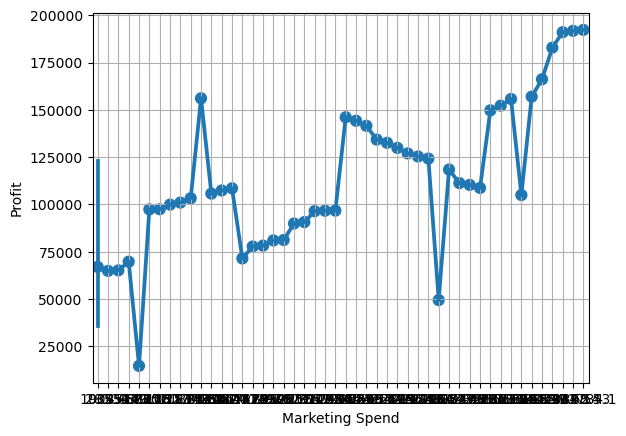

In [142]:
sns.pointplot(data=data, x='Marketing Spend', y='Profit')
plt.grid()
plt.show()

#### Relationship between numerical and categorical variables(feature) by box plot

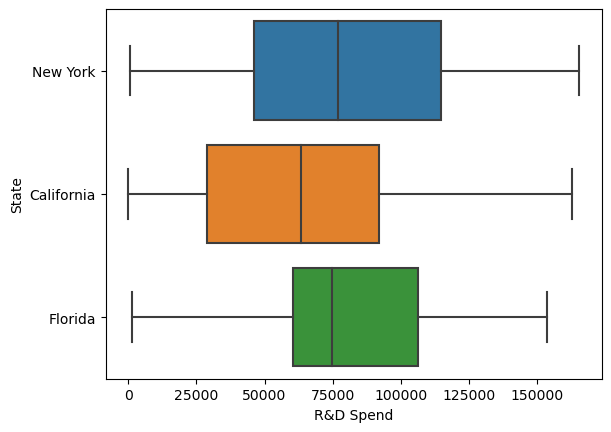

In [145]:
sns.boxplot(data=data, x='R&D Spend',y='State')
plt.show()

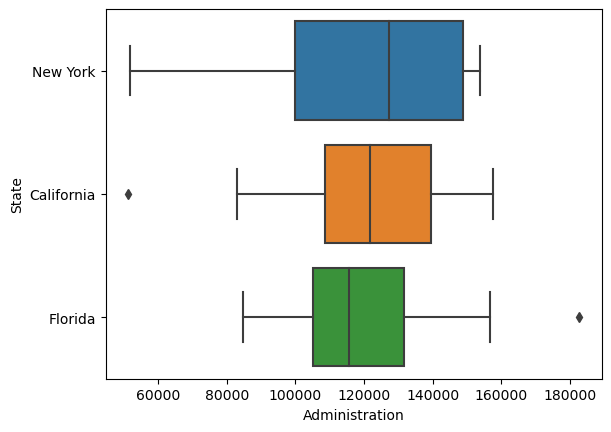

In [147]:
sns.boxplot(data=data, x='Administration',y='State')
plt.show()

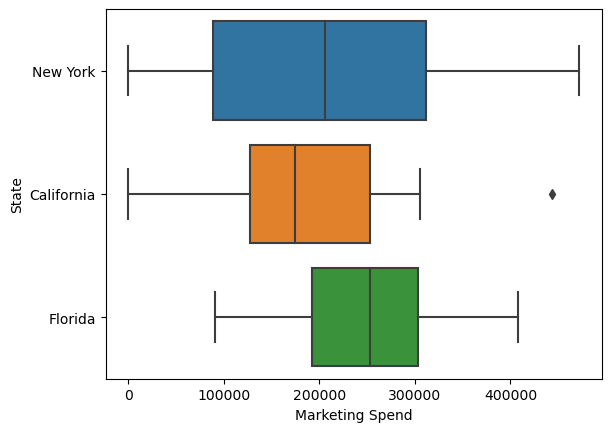

In [148]:
sns.boxplot(data=data, x='Marketing Spend',y='State')
plt.show()

#### Checking null values

In [152]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Feature Engineering

Apply the get_dummies on the categorical variable(feature) "state"

In [156]:
# Get the number of unique labels in state column
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [158]:
# print the number of labels for state feature
print(data.State.value_counts())

New York      17
California    17
Florida       16
Name: State, dtype: int64


In [155]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

##### NB: The state feature(variable) is categorical, this means it has a type of object. if you put this feature to a model machine learning can't be able to understand categorical data it undersatnd only numerical data. so, we have to convert this categorical data into numerical data by using get_dummies method.

In [160]:
dummies= pd.get_dummies(data.State)

In [162]:
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


Merge dummies to a dataframe

In [165]:
merge= pd.concat([data,dummies],axis=1)

In [166]:
merge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [167]:
data= merge.drop(['State','California'],axis=1)

In [169]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [170]:
data.shape

(50, 6)

#### create dependent and independent variables ie. x and y

In [181]:
target_feature= 'Profit'
Y= data[target_feature]

In [182]:
# Separate object from input features
X= data.drop(target_feature,axis= 1)

In [183]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [186]:
X.shape

(50, 5)

### Split a dataset into training and testing data

In [187]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=1)

In [188]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((40, 5), (10, 5), (40,), (10,))

In [189]:
mlinReg= LinearRegression()

In [191]:
mlinReg.fit(X_train,Y_train)

LinearRegression()

In [192]:
X_test.shape

(10, 5)

In [193]:
y_Pred= mlinReg.predict(X_test)

In [195]:
y_Pred.shape

(10,)

#### Compare actual with predicted values(Y_test with y_Pred)

In [196]:
data1= pd.DataFrame({'Actual':Y_test, 'Predicted':y_Pred,'Variance':Y_test-y_Pred})

In [198]:
data1.head()

,Actual,Predicted,Variance
27,105008.31,114664.417159,-9656.107159
35,96479.51,90593.155316,5886.354684
40,78239.91,75692.841516,2547.068484
38,81229.06,70221.886796,11007.173204
2,191050.39,179790.255149,11260.134851


In [ ]:
data.plot.scatter(data1)

##### get parameters

In [202]:
# intercep(b0)
print("b_0=",mlinReg.intercept_)

b_0= 49549.7073036606


In [203]:
# coeficients(b_1,b_2,b_3,b_4)
print("coeficients:", mlinReg.coef_)

coeficients: [ 7.74342081e-01 -9.44369585e-03  2.89183133e-02  5.82738646e+02
  2.72794662e+02]


In [218]:
sc= r2_score(Y_test,y_Pred)*100

In [220]:
print("Score=", sc,"%")

Score= 96.49618042059875 %


In [225]:
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,y_Pred))
print("Mean Squared Error",metrics.mean_squared_error(Y_test,y_Pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_absolute_error(Y_test,y_Pred)))

Mean Absolute Error: 7698.119817495861
Mean Squared Error 79495441.50424427
Root Mean Squared Error 87.73892988574605
